In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
#change
# Load the data

In [3]:
train = np.load('data/fashion_train.npy')   
test = np.load('data/fashion_test.npy')

### Desciption of data
- T-shirt/top = 0
- Trouser = 1
- Pullover = 2
- Dress = 3
- Shirt = 4

In [4]:
T_shirt_top = []
Trouser = []
Pullover = []
Dress = []
Shirt = []
y = []
train_witout_y = []

In [5]:
for i in range(len(train)):
    if train[i][-1] == 0:
        T_shirt_top.append(train[i][:len(train[i])-1])
    if train[i][-1] == 1:
        Trouser.append(train[i][:len(train[i])-1])
    if train[i][-1] == 2:
        Pullover.append(train[i][:len(train[i])-1])
    if train[i][-1] == 3:
        Dress.append(train[i][:len(train[i])-1])
    if train[i][-1] == 4:
        Shirt.append(train[i][:len(train[i])-1])
    y.append(train[i][-1])
    train_witout_y.append(train[i][:len(train[i])-1])


T_shirt_top = np.array(T_shirt_top)
Trouser = np.array(Trouser)
Pullover = np.array(Pullover)
Dress = np.array(Dress)
Shirt = np.array(Shirt)
y = np.array(y)
train_witout_y = np.array(train_witout_y)


In [7]:
n_tshirts=len(T_shirt_top)
n_trousers=len(Trouser)
n_pullovers=len(Pullover)
n_dresses=len(Dress)
n_shirt = len(Shirt)

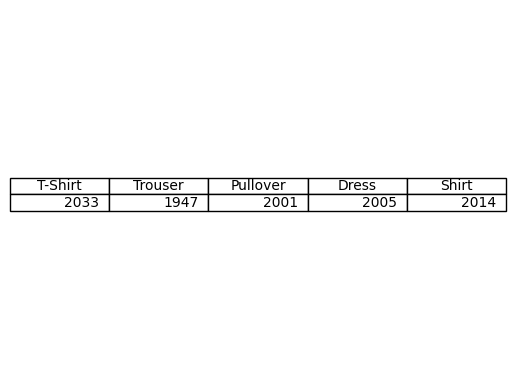

In [9]:
import matplotlib.pyplot as plt

# Example data
data = [
    [n_tshirts,n_trousers ,n_pullovers ,n_dresses ,n_shirt ]
]
columns = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Shirt']

# Create a figure and axis
fig, ax = plt.subplots()

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=data, colLabels=columns, loc='center')

# Save as an image
plt.savefig('table_output.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()


In [8]:
print(f"number of thirts: {n_tshirts}")
print(f"number of trousers: {n_trousers}")
print(f"number of pullovers: {n_pullovers}")
print(f"number of dresses: {n_dresses}")
print(f"number of shirts: {n_shirt}")

number of thirts: 2033
number of trousers: 1947
number of pullovers: 2001
number of dresses: 2005
number of shirts: 2014


In [7]:
#image scaling
images=[]
for i in range(len(train_witout_y)):
    images.append( (train_witout_y[i]-train_witout_y[i].mean())/train_witout_y[i].std() )
train_witout_y=np.array(images)

In [8]:
n=11
print(np.min(train_witout_y[n,:]))
print(np.max(train_witout_y[n,:]))

-0.9483432575866718
2.40016702545137


In [9]:
col_means=[]
col_stds=[]
for i in range(train_witout_y.shape[1]):
    col_means.append(train_witout_y[:,i].mean())
    col_stds.append(train_witout_y[:,i].std())

print(max(col_means))
print(min(col_means))
print(max(col_stds))
print(min(col_stds))

1.3066152893729432
-0.9311611601823679
1.2874451265161664
0.25042780362418515


In [10]:
feature=1
mean=np.mean(train_witout_y[:,:])
std=np.std(train_witout_y[:,feature])
Max=np.max(train_witout_y[:,feature])
Min=np.min(train_witout_y[:,feature])
print(mean)

-1.731041613905346e-19


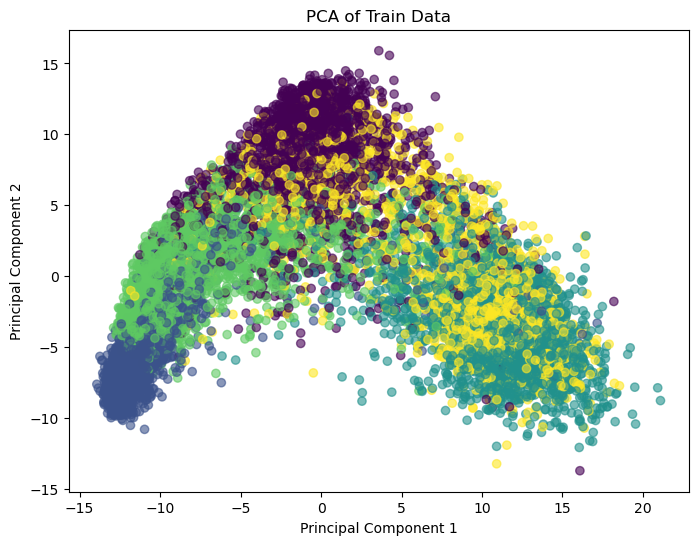

In [11]:
# Perform PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
pca.fit(train_witout_y)
score=pca.transform(train_witout_y)


# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(score[:, 0], score[:, 1], c=y, cmap='viridis', alpha=0.6)
#plt.colorbar(label='Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Train Data')
plt.show()


# Cumulative distribution of explained variance for the PCA

In [12]:
pca = PCA(n_components=28*28)

Numbers of PC 118 that contian 90% of the variance


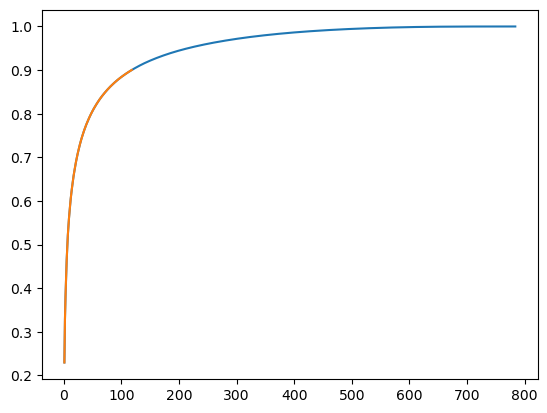

In [20]:
pca.fit(train_witout_y)
eigenvalues=pca.explained_variance_ratio_
eigenvalues=np.sort(eigenvalues)[::-1]
cumulative_dist=np.cumsum(eigenvalues)


counter=0
s=0
for i in eigenvalues:
    counter+=1
    s+=i
    if s >= 0.90:
        break

print(f'Numbers of PC {counter} that contian {round(s*100)}% of the variance')

plt.plot(range(1,785),cumulative_dist)
plt.plot(range(1,counter+1),cumulative_dist[0:counter])

# biplot

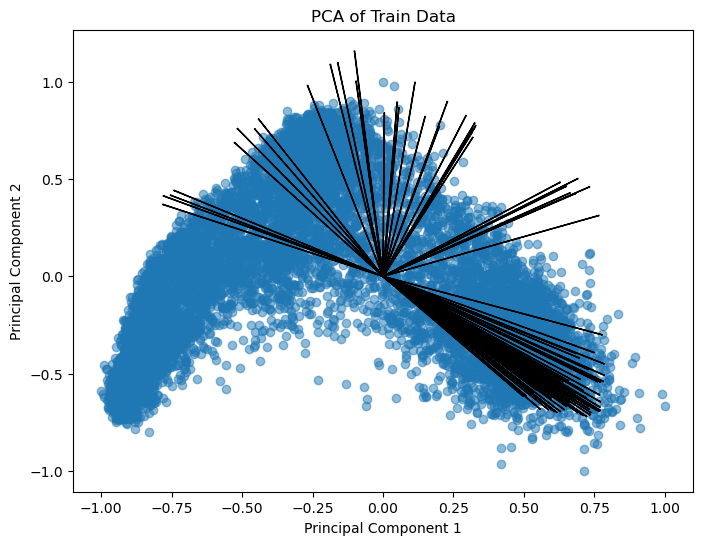

In [21]:
pca = PCA(n_components=2)
pca.fit(train_witout_y)
eigenvectors=pca.components_
train_reduced=pca.transform(train_witout_y)

min_vals = train_reduced.min(axis=0)  # Minimum values per column
max_vals = train_reduced.max(axis=0)  # Maximum values per column

train_reduced_normalized = 2 * (train_reduced - min_vals) / (max_vals - min_vals) - 1

# Scatter plot
scale=10
plt.figure(figsize=(8, 6))
plt.scatter(train_reduced_normalized[:, 0], train_reduced_normalized[:, 1], alpha=0.5)
arrows=[]
for i in range(len(eigenvectors[0])):
    x=eigenvectors[0][i]*scale
    y=eigenvectors[1][i]*scale
    arrow=(x,y,np.sqrt(x**2+y**2))
    arrows.append(arrow)

selected_arrows = sorted(arrows, key=lambda x: x[-1])[::-1][:90]

for arrow in selected_arrows:
    plt.arrow(0,0,arrow[0],arrow[1])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Train Data')
plt.show()


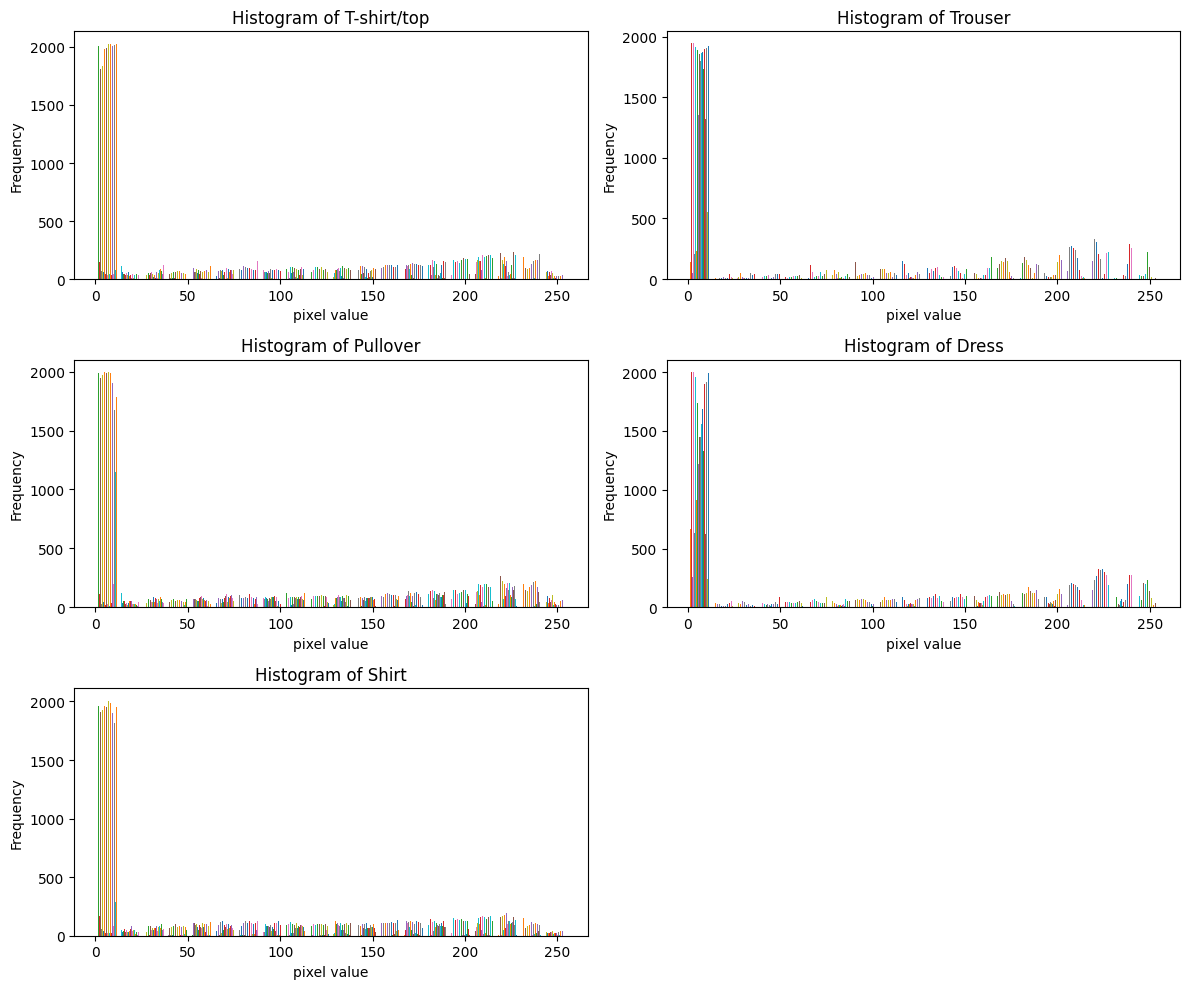

In [10]:
list_of_classes = [T_shirt_top, Trouser, Pullover, Dress, Shirt]
name_of_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']
fig, ax = plt.subplots(3, 2, figsize=(12, 10))

ax[0, 0].hist(list_of_classes[0], bins = 20)
ax[0, 0].set_title('Histogram of ' + name_of_classes[0])
ax[0, 0].set_xlabel('pixel value')
ax[0, 0].set_ylabel('Frequency')

ax[0, 1].hist(list_of_classes[1], bins = 20)
ax[0, 1].set_title('Histogram of ' + name_of_classes[1])
ax[0, 1].set_xlabel('pixel value')
ax[0, 1].set_ylabel('Frequency')

ax[1, 0].hist(list_of_classes[2], bins = 20)
ax[1, 0].set_title('Histogram of ' + name_of_classes[2])
ax[1, 0].set_xlabel('pixel value')
ax[1, 0].set_ylabel('Frequency')

ax[1, 1].hist(list_of_classes[3], bins = 20)
ax[1, 1].set_title('Histogram of ' + name_of_classes[3])
ax[1, 1].set_xlabel('pixel value')
ax[1, 1].set_ylabel('Frequency')

ax[2, 0].hist(list_of_classes[4], bins = 20)
ax[2, 0].set_title('Histogram of ' + name_of_classes[4])
ax[2, 0].set_xlabel('pixel value')
ax[2, 0].set_ylabel('Frequency')

fig.delaxes(ax[2, 1])

plt.tight_layout()
plt.show()

0

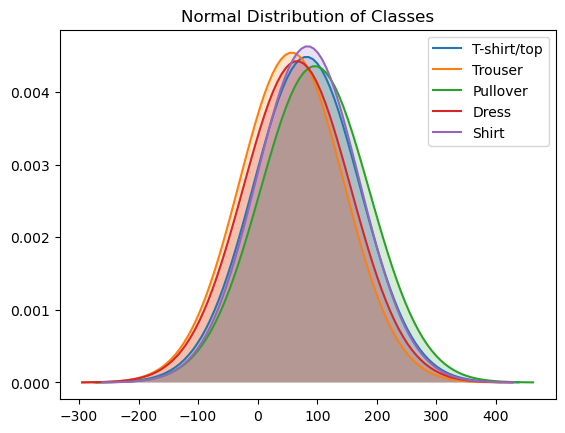

In [81]:
mean = [T_shirt_top.mean(), Trouser.mean(), Pullover.mean(), Dress.mean(), Shirt.mean()]
std = [T_shirt_top.std(), Trouser.std(), Pullover.std(), Dress.std(), Shirt.std()]
name_of_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']
handles = []

for i in range(len(mean)):
    x = np.linspace(mean[i] - 4*std[i], mean[i] + 4*std[i], 100)
    
    y = stats.norm.pdf(x, mean[i], std[i])

    handle, = plt.plot(x, y, label=name_of_classes[i])
    plt.fill_between(x, y, alpha=0.2)

    handles.append(handle)

plt.legend(handles, name_of_classes)
plt.title('Normal Distribution of Classes')

plt.show()


# Histogram of images

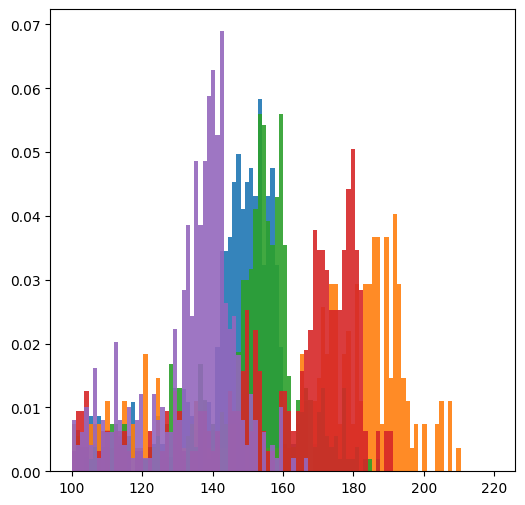

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

def plot_histogram_average(inp_array):
    avg_image = np.mean(inp_array, axis=0)
    ax.hist(avg_image.ravel(), bins=100, range=(100, 220), density=True,alpha=0.9)

for cls in list_of_classes:
    plot_histogram_average(cls)


0.06666666666666667
